## 1. Importing the required libraries

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [151]:
cars = pd.read_csv(r"C:\Users\sanjay\Desktop\Analytics Vidya\Python\MACHINE LEARNING\autos_small.csv")
cars.head(5)

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,NaN,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio


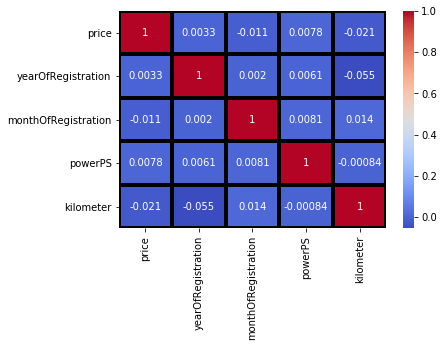

In [152]:
#heatmap works for continuous variable only
sns.heatmap(cars.corr(),cmap= 'coolwarm',annot=True,linewidths=3, linecolor='black') 

## 2. Data Preprocessing and Exploratory data analysis

In [3]:
#Drop Duplicates(if any)
cars = cars.drop_duplicates()
cars.shape

(9985, 11)

In [4]:
## 1. Analyze Missing value
feature_nan = [feature for feature in cars.columns if cars[feature].isnull().sum()>0]
print(len(feature_nan)) #seeing missing value of both conti+categ features (complete cars dataset)
# cars[feature_nan] 

4


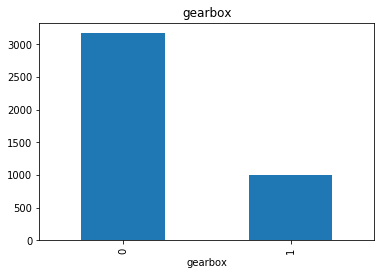

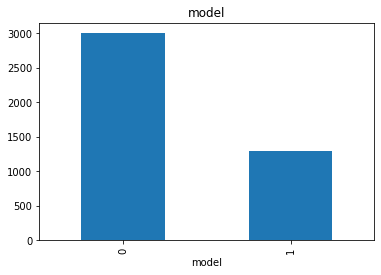

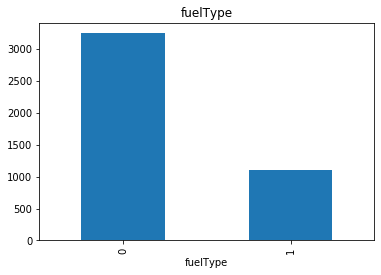

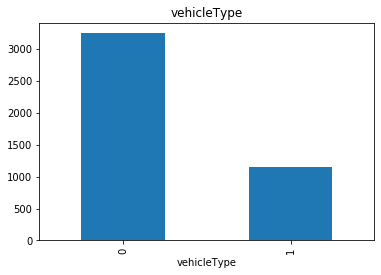

In [5]:
for feature in feature_nan: #since there are many missing value, so lets c if they have any relation with price
    cars_missing = cars.copy()
    cars_missing[feature] = np.where(cars_missing[feature].isnull(),1,0)
    cars_missing.groupby(feature)['price'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [6]:
## 2. Work with missing values in continuous variables & impute it
conti_feature = [feature for feature in cars.columns if cars[feature].dtypes != 'O']
print(len(conti_feature))

5


In [7]:
conti_feature_nan = [feature for feature in conti_feature if cars[feature].isnull().sum()>0]
print('no. of continuous feature with missing value',len(conti_feature_nan))
print('no of missing value in that continuous feature is {}'.format(cars[conti_feature_nan].isnull().sum()))

no. of continuous feature with missing value 0
no of missing value in that continuous feature is Series([], dtype: float64)


In [8]:
## 3. Work with missing values in categorical variables & impute it
cate_feature = [feature for feature in cars.columns if (cars[feature].dtypes == 'O')]
print(len(cate_feature))

6


In [9]:
cate_feature_nan = [feature for feature in cate_feature if cars[feature].isnull().sum()>0]
print('no. of categorical feature with missing value',len(cate_feature_nan))
print('no of missing value in that categorical feature is {}'.format(cars[cate_feature_nan].isnull().sum()))

no. of categorical feature with missing value 4
no of missing value in that categorical feature is gearbox         577
model           566
fuelType        943
vehicleType    1050
dtype: int64


In [10]:
for feature in cate_feature_nan: #just filled all missing cate. variable with term as 'Missing'
    cars[feature] = cars[feature].fillna('Missing')
cars[cate_feature_nan].head(50)

,gearbox,model,fuelType,vehicleType
0,manuell,escort,benzin,kombi
1,manuell,3er,Missing,cabrio
2,manuell,c_klasse,benzin,kombi
3,manuell,a3,diesel,limousine
4,automatik,fortwo,diesel,cabrio
5,manuell,3er,benzin,limousine
6,manuell,yaris,benzin,kleinwagen
7,manuell,a4,diesel,kombi
8,manuell,golf,benzin,kleinwagen
9,manuell,transporter,diesel,bus


In [11]:
cars[cate_feature_nan].isnull().sum()

gearbox        0
model          0
fuelType       0
vehicleType    0
dtype: int64

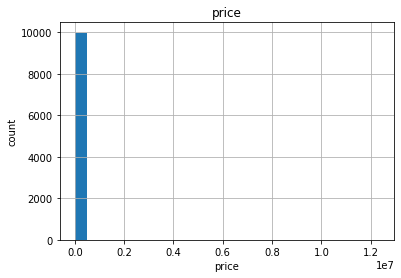

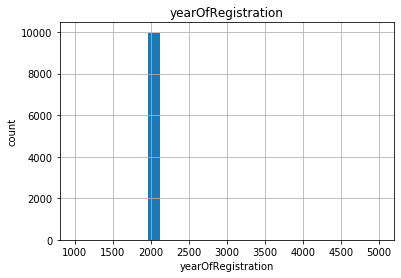

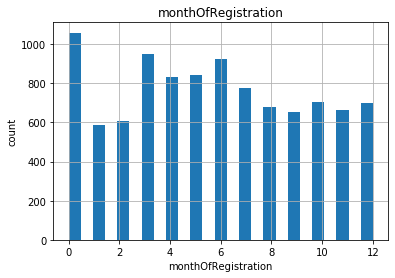

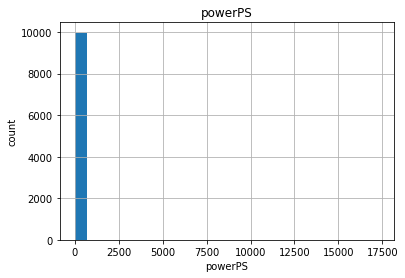

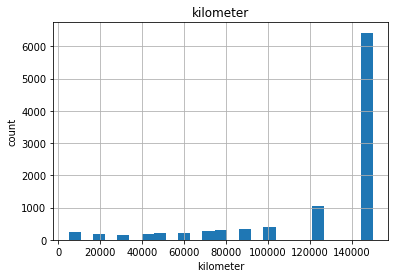

In [12]:
for feature in conti_feature:  #analyzed the conti variable by creating histograms to understand there distribution
    cars[feature].hist(bins = 25)  
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

In [13]:
conti_feature

['price', 'yearOfRegistration', 'monthOfRegistration', 'powerPS', 'kilometer']

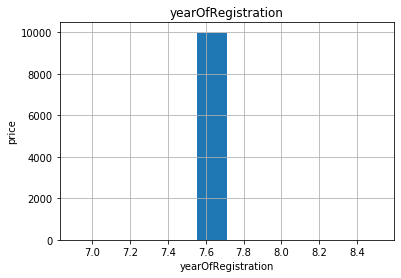

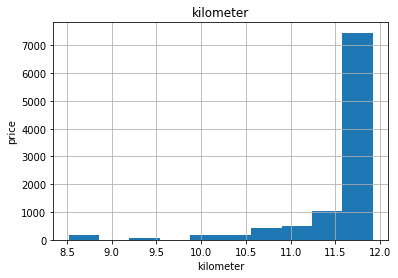

In [14]:
for feature in conti_feature:        #using logarithmeic transformation on conti feature 
    cars_log = cars.copy()
    if 0 in cars_log[feature].unique():
        pass
    else:
        cars_log[feature] = np.log(cars_log[feature]).hist()
        plt.xlabel(feature)
        plt.ylabel('price')
        plt.title(feature)
        plt.show()

In [15]:
cars_log.head(5)

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,"AxesSubplot(0.125,0.125;0.775x0.755)",benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,"AxesSubplot(0.125,0.125;0.775x0.755)",Missing,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,"AxesSubplot(0.125,0.125;0.775x0.755)",benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,"AxesSubplot(0.125,0.125;0.775x0.755)",diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,"AxesSubplot(0.125,0.125;0.775x0.755)",diesel,smart,cabrio


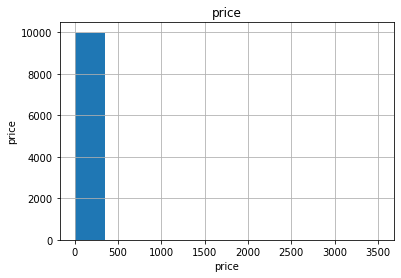

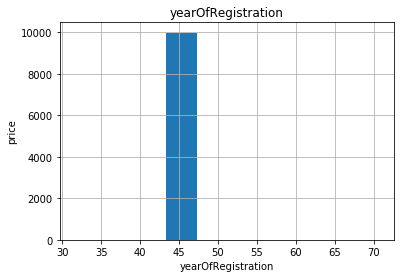

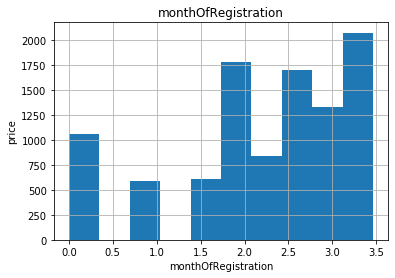

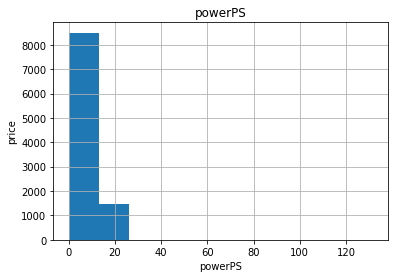

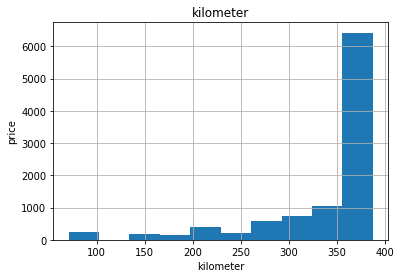

In [16]:
for feature in conti_feature:  
    cars_sqrt = cars.copy()
    cars_sqrt[feature] = np.sqrt(cars_sqrt[feature]).hist()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

In [17]:
cars_sqrt.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,"AxesSubplot(0.125,0.125;0.775x0.755)",benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,"AxesSubplot(0.125,0.125;0.775x0.755)",Missing,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,"AxesSubplot(0.125,0.125;0.775x0.755)",benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,"AxesSubplot(0.125,0.125;0.775x0.755)",diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,"AxesSubplot(0.125,0.125;0.775x0.755)",diesel,smart,cabrio


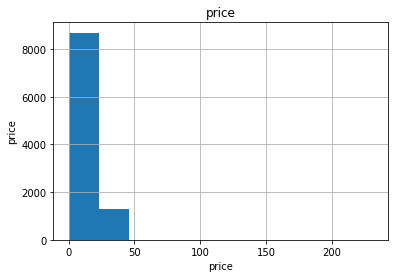

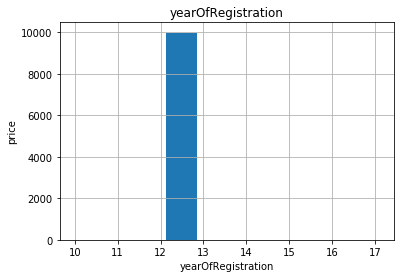

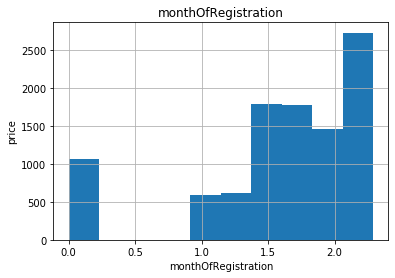

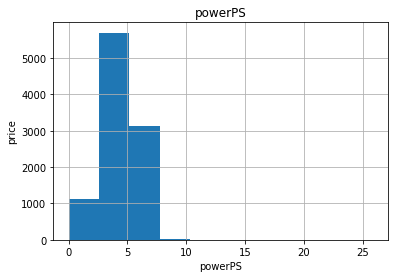

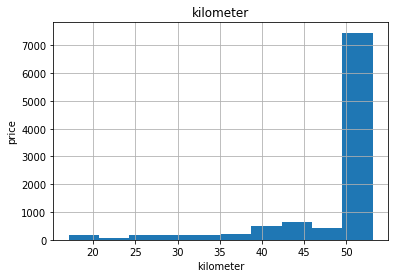

In [18]:
for feature in conti_feature:  
    cars_cube = cars.copy()
    cars_cube[feature] = np.power(cars_cube[feature],1/3).hist()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

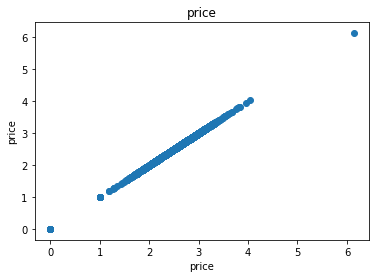

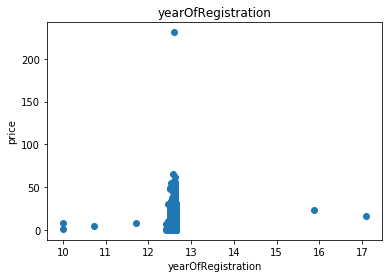

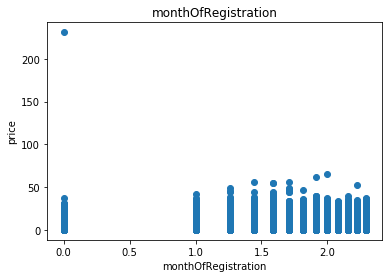

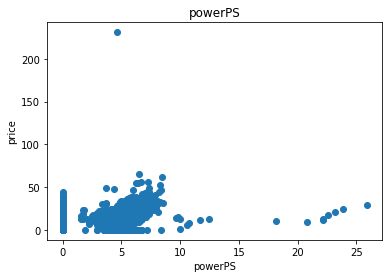

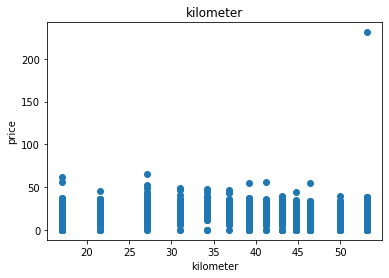

In [19]:
for feature in conti_feature:        #we have selected sqrt root transformation as our variable transformation 
    cars_cube = cars.copy()                  #since it gives more symmetric results
    cars_cube[feature] = np.power(cars_cube[feature],1/3)
    cars_cube['price'] = np.power(cars_cube['price'],1/3)
    plt.scatter(cars_cube[feature],cars_cube['price'])
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

In [20]:
cars.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,Missing,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio


In [21]:
cars_cube.head() #this is the new dataset which we will adopt #####################

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,7.368063,Ford_Escort,1992,8,manuell,89,escort,39.148676,benzin,ford,kombi
1,15.182945,Bmw_320_cabrio,1996,0,manuell,150,3er,50.000000,Missing,bmw,cabrio
2,13.005914,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,53.132928,benzin,mercedes_benz,kombi
3,15.874011,A3_Limousine,2006,7,manuell,0,a3,53.132928,diesel,audi,limousine
4,13.750689,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,53.132928,diesel,smart,cabrio


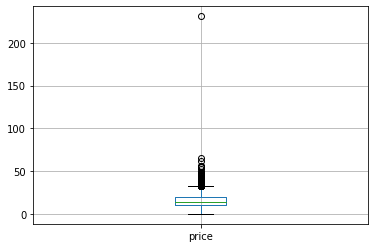

In [22]:
cars_cube['price'].plot.box(grid=True)

In [23]:
cars_cube = cars_cube[cars_cube['price']<32]

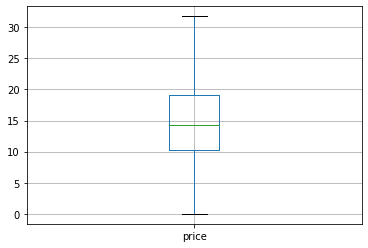

In [24]:
cars_cube['price'].plot.box(grid=True)

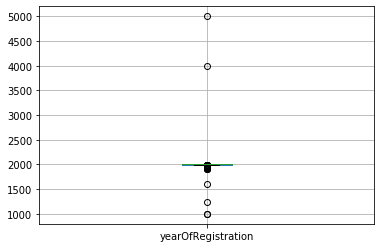

In [25]:
cars_cube['yearOfRegistration'].plot.box(grid=True)

In [26]:
cars_cube = cars_cube[cars_cube['yearOfRegistration']<4000]

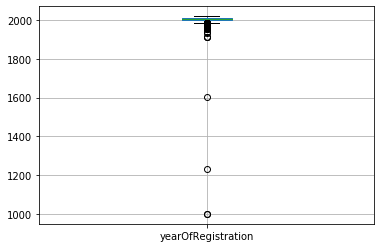

In [27]:
cars_cube['yearOfRegistration'].plot.box(grid=True)

In [28]:
cars_cube = cars_cube[cars_cube['yearOfRegistration']>1985]

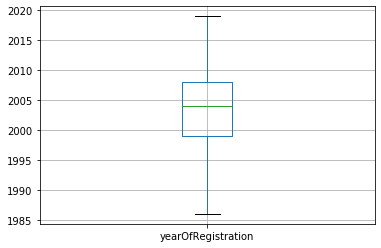

In [29]:
cars_cube['yearOfRegistration'].plot.box(grid=True)

In [30]:
cars_cube.shape

(9681, 11)

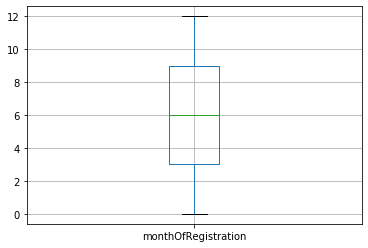

In [31]:
cars_cube['monthOfRegistration'].plot.box(grid=True)

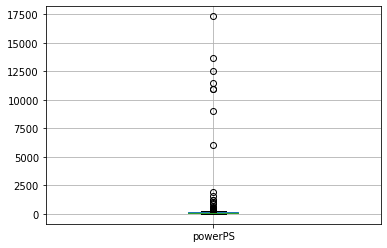

In [32]:
cars_cube['powerPS'].plot.box(grid=True)

In [33]:
cars_cube = cars_cube[cars_cube['powerPS']<245]

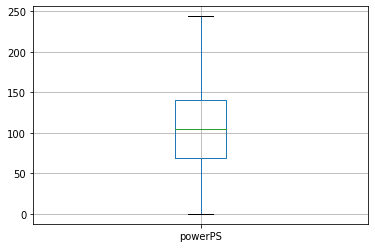

In [34]:
cars_cube['powerPS'].plot.box(grid=True)

In [35]:
cars_cube.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,7.368063,Ford_Escort,1992,8,manuell,89,escort,39.148676,benzin,ford,kombi
1,15.182945,Bmw_320_cabrio,1996,0,manuell,150,3er,50.000000,Missing,bmw,cabrio
2,13.005914,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,53.132928,benzin,mercedes_benz,kombi
3,15.874011,A3_Limousine,2006,7,manuell,0,a3,53.132928,diesel,audi,limousine
4,13.750689,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,53.132928,diesel,smart,cabrio


In [36]:
cars_cube.shape

(9348, 11)

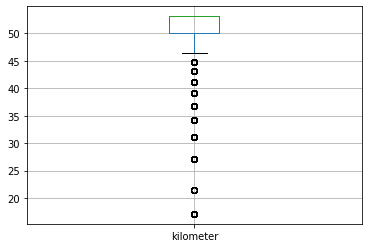

In [37]:
cars_cube['kilometer'].plot.box(grid=True)

In [38]:
cars_cube = cars_cube[cars_cube['kilometer']>40]

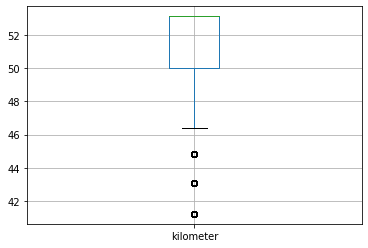

In [39]:
cars_cube['kilometer'].plot.box(grid=True)

In [40]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=cars_cube['kilometer'].quantile(0.75)-cars_cube['kilometer'].quantile(0.25)
IQR

3.1329284591305537

In [41]:
#### Extreme outliers
lower_bridge=cars_cube['kilometer'].quantile(0.25)-(IQR*3)
upper_bridge=cars_cube['kilometer'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

40.601214622608325
62.5317138365222


(None, None)

In [42]:
cars_cube = cars_cube[cars_cube['kilometer']<62.53]

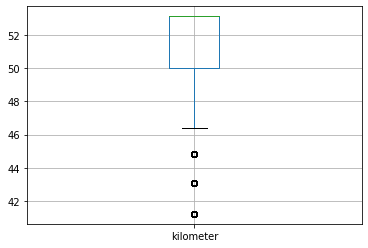

In [43]:
cars_cube['kilometer'].plot.box(grid=True)

In [44]:
cars_cube = cars_cube[cars_cube['kilometer']>40.60]

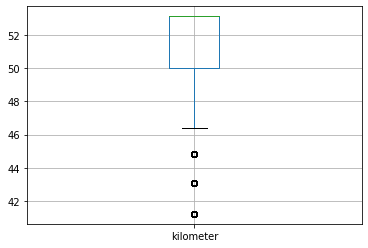

In [45]:
cars_cube['kilometer'].plot.box(grid=True)

In [46]:
cars_cube.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
1,15.182945,Bmw_320_cabrio,1996,0,manuell,150,3er,50.000000,Missing,bmw,cabrio
2,13.005914,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,53.132928,benzin,mercedes_benz,kombi
3,15.874011,A3_Limousine,2006,7,manuell,0,a3,53.132928,diesel,audi,limousine
4,13.750689,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,53.132928,diesel,smart,cabrio
5,13.049124,BMW_318ti_compact,2001,10,manuell,143,3er,53.132928,benzin,bmw,limousine


## Categorical features

In [47]:
cate_feature = [feature for feature in cars.columns if (cars[feature].dtypes == 'O')]
print(len(cate_feature))
cars[cate_feature].head()

6


,name,gearbox,model,fuelType,brand,vehicleType
0,Ford_Escort,manuell,escort,benzin,ford,kombi
1,Bmw_320_cabrio,manuell,3er,Missing,bmw,cabrio
2,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,manuell,c_klasse,benzin,mercedes_benz,kombi
3,A3_Limousine,manuell,a3,diesel,audi,limousine
4,Smart_Smart_cabrio_450_cdi,automatik,fortwo,diesel,smart,cabrio


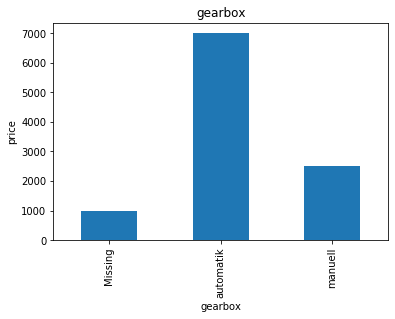

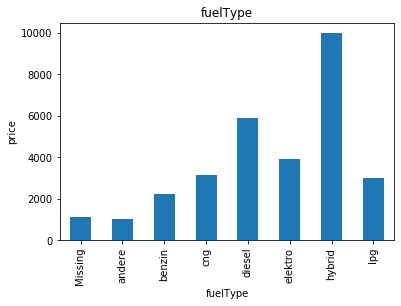

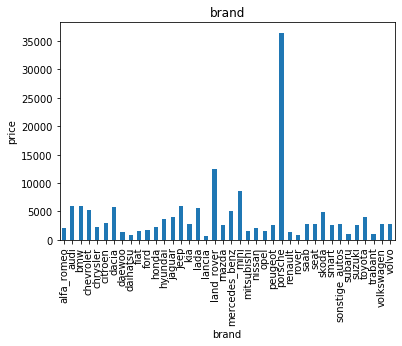

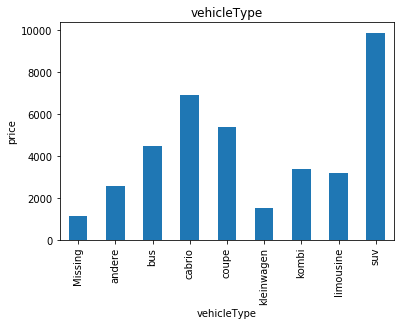

In [48]:
for feature in cate_feature:
    if feature in ['name','model']:
        pass
    else:
        cars.groupby(feature)['price'].median().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('price')
        plt.title(feature)
        plt.show()

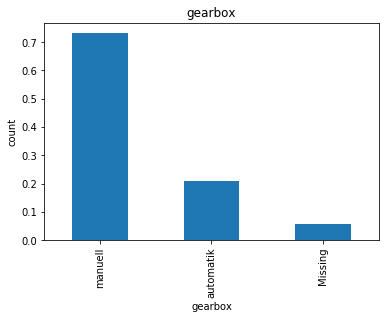

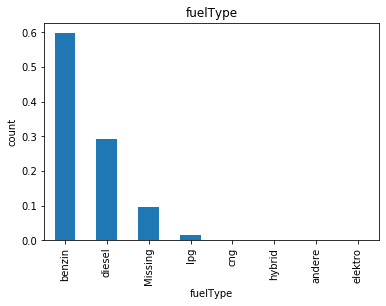

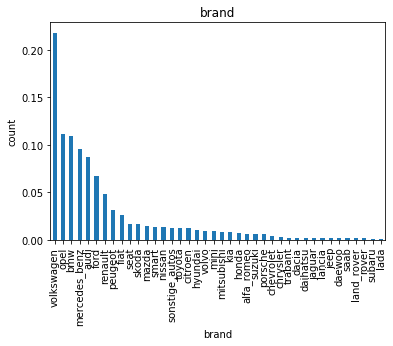

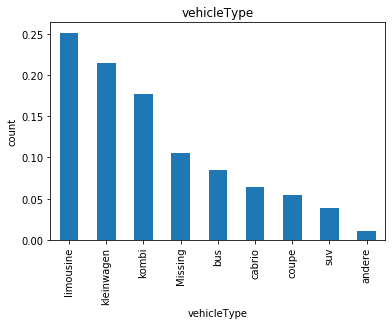

In [49]:
for feature in cate_feature:
    if feature in ['name','model']:
        pass
    else:
        (cars[feature].value_counts()/len(cars)).plot.bar()
        plt.xlabel(feature)
        plt.ylabel('count')
        plt.title(feature)
        plt.show()

In [50]:
cars[cate_feature].head()

,name,gearbox,model,fuelType,brand,vehicleType
0,Ford_Escort,manuell,escort,benzin,ford,kombi
1,Bmw_320_cabrio,manuell,3er,Missing,bmw,cabrio
2,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,manuell,c_klasse,benzin,mercedes_benz,kombi
3,A3_Limousine,manuell,a3,diesel,audi,limousine
4,Smart_Smart_cabrio_450_cdi,automatik,fortwo,diesel,smart,cabrio


In [51]:
for col in cars[cate_feature].columns:              #in order to check that how many labels each categorical feature has 
    print(col ,':' ,len(cars[col].unique()),'labels')        #data[col] give us the values inside the dataset col. by col.

name : 8819 labels
gearbox : 3 labels
model : 236 labels
fuelType : 8 labels
brand : 40 labels
vehicleType : 9 labels


In [52]:
#created a new variable as cars_cat which doesnt have name column
cars_cat = cars[cate_feature].drop('name',axis = 1)  

In [53]:
cars_cat.head()

,gearbox,model,fuelType,brand,vehicleType
0,manuell,escort,benzin,ford,kombi
1,manuell,3er,Missing,bmw,cabrio
2,manuell,c_klasse,benzin,mercedes_benz,kombi
3,manuell,a3,diesel,audi,limousine
4,automatik,fortwo,diesel,smart,cabrio


In [54]:
cars_cat[['gearbox','model','fuelType','brand','vehicleType']].nunique()

gearbox          3
model          236
fuelType         8
brand           40
vehicleType      9
dtype: int64

In [55]:
# let's obtain the counts for each one of the labels in model(since it really has lots of unique values)
# let's capture this in a dictionary that we can use to re-map the labels
cars_cat['model'].value_counts().to_dict()  

{'golf': 823,
 'andere': 711,
 'Missing': 566,
 '3er': 557,
 'polo': 386,
 'corsa': 330,
 'astra': 306,
 'a4': 267,
 'passat': 259,
 'c_klasse': 236,
 'e_klasse': 224,
 '5er': 216,
 'a6': 167,
 'focus': 164,
 'transporter': 153,
 'a3': 152,
 'fiesta': 152,
 'twingo': 145,
 'a_klasse': 129,
 '2_reihe': 123,
 'touran': 112,
 'fortwo': 103,
 '1er': 102,
 'vectra': 101,
 '3_reihe': 97,
 'clio': 93,
 'punto': 88,
 'zafira': 88,
 'megane': 87,
 'mondeo': 80,
 'ka': 75,
 'fabia': 70,
 'ibiza': 70,
 'lupo': 66,
 'x_reihe': 60,
 'octavia': 56,
 'cooper': 52,
 'sharan': 45,
 'clk': 44,
 '1_reihe': 42,
 'slk': 42,
 'micra': 42,
 '80': 40,
 'caddy': 39,
 '6_reihe': 38,
 'tt': 38,
 'omega': 37,
 '7er': 35,
 's_klasse': 31,
 'i_reihe': 31,
 'a5': 31,
 'z_reihe': 31,
 'leon': 29,
 'fox': 29,
 'meriva': 29,
 'yaris': 29,
 'civic': 28,
 'm_klasse': 28,
 '500': 28,
 'scenic': 28,
 'kangoo': 27,
 'escort': 27,
 'tigra': 26,
 'c_max': 26,
 'one': 26,
 'mx_reihe': 26,
 '911': 24,
 'sprinter': 24,
 'bora': 

In [56]:
# And now let's replace each label in X2 by its count

# first we make a dictionary that maps each label to the counts
cars_frequency_map = cars_cat['model'].value_counts().to_dict()

In [57]:
# and now we replace 'Item_Identifier' feature in the dataset data
cars_cat['model'] = cars_cat['model'].map(cars_frequency_map)

In [58]:
cars_cat['model'].head()

0     27
1    557
2    236
3    152
4    103
Name: model, dtype: int64

In [59]:
cars_cat.head()

,gearbox,model,fuelType,brand,vehicleType
0,manuell,27,benzin,ford,kombi
1,manuell,557,Missing,bmw,cabrio
2,manuell,236,benzin,mercedes_benz,kombi
3,manuell,152,diesel,audi,limousine
4,automatik,103,diesel,smart,cabrio


In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [61]:
cars_cat['gearbox'] = le.fit_transform(cars_cat['gearbox'])
cars_cat['model'] = le.fit_transform(cars_cat['model'])
cars_cat['fuelType'] = le.fit_transform(cars_cat['fuelType'])
cars_cat['brand'] = le.fit_transform(cars_cat['brand'])
cars_cat['vehicleType'] = le.fit_transform(cars_cat['vehicleType'])

In [62]:
cars_cat.head()

,gearbox,model,fuelType,brand,vehicleType
0,2,24,2,10,6
1,2,66,0,2,3
2,2,60,2,20,6
3,2,54,4,1,7
4,1,49,4,32,3


In [63]:
cars_cube.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
1,15.182945,Bmw_320_cabrio,1996,0,manuell,150,3er,50.000000,Missing,bmw,cabrio
2,13.005914,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,53.132928,benzin,mercedes_benz,kombi
3,15.874011,A3_Limousine,2006,7,manuell,0,a3,53.132928,diesel,audi,limousine
4,13.750689,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,53.132928,diesel,smart,cabrio
5,13.049124,BMW_318ti_compact,2001,10,manuell,143,3er,53.132928,benzin,bmw,limousine


In [64]:
cars_cube = cars_cube.drop(['name','gearbox','model','fuelType','brand','vehicleType'],axis = 1)

In [65]:
cars_cube.head()

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer
1,15.182945,1996,0,150,50.000000
2,13.005914,1998,0,150,53.132928
3,15.874011,2006,7,0,53.132928
4,13.750689,2002,7,41,53.132928
5,13.049124,2001,10,143,53.132928


In [66]:
cars1 = pd.concat([cars_cube,cars_cat],axis =1 )

In [67]:
cars1.head(50)

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer,gearbox,model,fuelType,brand,vehicleType
0,NaN,NaN,NaN,NaN,NaN,2,24,2,10,6
1,15.182945,1996.0,0.0,150.0,50.000000,2,66,0,2,3
2,13.005914,1998.0,0.0,150.0,53.132928,2,60,2,20,6
3,15.874011,2006.0,7.0,0.0,53.132928,2,54,4,1,7
4,13.750689,2002.0,7.0,41.0,53.132928,1,49,4,32,3
5,13.049124,2001.0,10.0,143.0,53.132928,2,66,2,2,7
6,15.874011,2008.0,11.0,69.0,50.000000,2,26,2,36,5
7,8.291344,1999.0,6.0,180.0,53.132928,2,62,4,1,6
8,21.543629,2005.0,10.0,200.0,53.132928,2,69,2,38,5
9,25.712312,2006.0,1.0,131.0,53.132928,2,55,4,38,2


In [68]:
#Drop the rows where at least one element is missing(as this may be an outlier where hadnt removed the outlier initially )
cars1 = cars1.dropna() 

In [69]:
cars1.isnull().sum()

price                  0
yearOfRegistration     0
monthOfRegistration    0
powerPS                0
kilometer              0
gearbox                0
model                  0
fuelType               0
brand                  0
vehicleType            0
dtype: int64

In [70]:
cars1.head()

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer,gearbox,model,fuelType,brand,vehicleType
1,15.182945,1996.0,0.0,150.0,50.000000,2,66,0,2,3
2,13.005914,1998.0,0.0,150.0,53.132928,2,60,2,20,6
3,15.874011,2006.0,7.0,0.0,53.132928,2,54,4,1,7
4,13.750689,2002.0,7.0,41.0,53.132928,1,49,4,32,3
5,13.049124,2001.0,10.0,143.0,53.132928,2,66,2,2,7


## 3. Scaling the dataset

In [ ]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler

In [72]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(cars1)
scaled_data = pd.DataFrame(scaled_data, columns = cars1.columns)
scaled_data.head()

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer,gearbox,model,fuelType,brand,vehicleType
0,0.478732,0.303030,0.000000,0.614754,0.737172,1.0,0.956522,0.000000,0.051282,0.375
1,0.410088,0.363636,0.000000,0.614754,1.000000,1.0,0.869565,0.285714,0.512821,0.750
2,0.500522,0.606061,0.583333,0.000000,1.000000,1.0,0.782609,0.571429,0.025641,0.875
3,0.433572,0.484848,0.583333,0.168033,1.000000,0.5,0.710145,0.571429,0.820513,0.375
4,0.411451,0.454545,0.833333,0.586066,1.000000,1.0,0.956522,0.285714,0.051282,0.875


In [73]:
cars1.head() 

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer,gearbox,model,fuelType,brand,vehicleType
1,15.182945,1996.0,0.0,150.0,50.000000,2,66,0,2,3
2,13.005914,1998.0,0.0,150.0,53.132928,2,60,2,20,6
3,15.874011,2006.0,7.0,0.0,53.132928,2,54,4,1,7
4,13.750689,2002.0,7.0,41.0,53.132928,1,49,4,32,3
5,13.049124,2001.0,10.0,143.0,53.132928,2,66,2,2,7


In [74]:
cars1 = scaled_data 

In [75]:
cars1.head() 

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer,gearbox,model,fuelType,brand,vehicleType
0,0.478732,0.303030,0.000000,0.614754,0.737172,1.0,0.956522,0.000000,0.051282,0.375
1,0.410088,0.363636,0.000000,0.614754,1.000000,1.0,0.869565,0.285714,0.512821,0.750
2,0.500522,0.606061,0.583333,0.000000,1.000000,1.0,0.782609,0.571429,0.025641,0.875
3,0.433572,0.484848,0.583333,0.168033,1.000000,0.5,0.710145,0.571429,0.820513,0.375
4,0.411451,0.454545,0.833333,0.586066,1.000000,1.0,0.956522,0.285714,0.051282,0.875


## 4. Splitting the dataset

In [ ]:
#splitting tha dataset into train and test
X = cars1.drop(['price'],axis=1)
y = cars1['price']
X.shape, y.shape

In [77]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size = 0.2,random_state = 56)

## 5. Implementing various models and checking scores

# MODEL 1 - LINEAR REGRESSION

In [78]:
#implement linear regression
from sklearn.linear_model import LinearRegression as LR #imported requ. library
from sklearn.metrics import mean_absolute_error as mae

In [79]:
lr = LR() #creating an instance of it
lr.fit(train_X,train_y) #fitting ove the TRAIN data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
train_predict = lr.predict(train_X)    # predicting over train data first and calculate mae(over train data)
k = mae(train_predict,train_y)
print('Training Mean absolute error', k)

Training Mean absolute error 0.08800322430036087


In [81]:
test_predict = lr.predict(test_X)  # predicting over test data first and calculate mae(over test data)
k = mae(test_predict,test_y)
print('Test Mean absolute error', k)

Test Mean absolute error 0.0889142954368137


In [82]:
from math import sqrt                   #first by MAE
mae = mae(test_y,test_predict)    
from sklearn.metrics import r2_score
r2 = r2_score(test_y, test_predict)

adj_r2 = 1 - float(len(y)-1)/(len(y)-len(lr.coef_)-1)*(1 - r2)

mae, r2, adj_r2,  lr.coef_, lr.intercept_ #mae-error, r2 is the score by this model, lr.coef_is the angle & den d intercept

(0.0889142954368137,
 0.5664114776999019,
 0.5659415479430738,
 array([ 0.32758246,  0.03084471,  0.30572859, -0.16072818, -0.04226076,
        -0.00610939,  0.19743138,  0.00955516,  0.07334742]),
 0.1825033054621083)

In [83]:
from sklearn.metrics import mean_squared_error            #SECOND BY RMSE
rmse = sqrt(mean_squared_error(test_y, test_predict))
from sklearn.metrics import r2_score
r2 = r2_score(test_y, test_predict)

adj_r2 = 1 - float(len(y)-1)/(len(y)-len(lr.coef_)-1)*(1 - r2)

rmse, r2, adj_r2, lr.coef_, lr.intercept_

(0.12220680530198695,
 0.5664114776999019,
 0.5659415479430738,
 array([ 0.32758246,  0.03084471,  0.30572859, -0.16072818, -0.04226076,
        -0.00610939,  0.19743138,  0.00955516,  0.07334742]),
 0.1825033054621083)

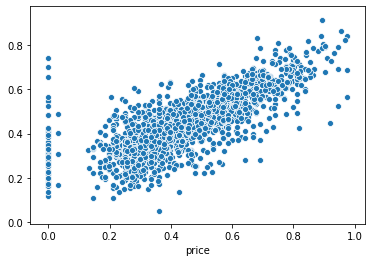

In [84]:
sns.scatterplot(test_y,test_predict)

Text(0.5, 1.0, 'Predicted vs Actual values')

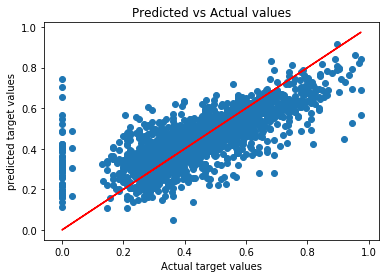

In [85]:
fig,ax = plt.subplots()
ax.scatter(test_y,test_predict)
ax.plot(test_y,test_y,color = 'red')
ax.set_xlabel('Actual target values')
ax.set_ylabel('predicted target values')
ax.set_title('Predicted vs Actual values')

In [86]:
from sklearn import metrics     #checking errors
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, test_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, test_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, test_predict)))

Mean Absolute Error: 0.0889142954368137
Mean Squared Error: 0.014934503262117746
Root Mean Squared Error: 0.12220680530198695


### Feature selection and importance

In [87]:
# SELECTING FEATURES FOR MODEL BY CHECKING FEATURE IMPORTANCE 
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [88]:
imp = model.feature_importances_
feature_names = cars1.iloc[:, 1:].columns.tolist()
feature_names
feature_imp_dir = dict(zip(feature_names, imp))
features = sorted(feature_imp_dir.items(), key=lambda x: x[1], reverse=True)
features

[('yearOfRegistration', 0.33950377856960784),
 ('powerPS', 0.2570381147202409),
 ('kilometer', 0.07577450872548958),
 ('vehicleType', 0.073066081535503),
 ('fuelType', 0.07175595435043035),
 ('monthOfRegistration', 0.05724835885521604),
 ('brand', 0.05528124581649742),
 ('model', 0.04722489861294606),
 ('gearbox', 0.023107058814068875)]

In [89]:
#Droping powerPS , fuelType and brand as these features are less importnat than the others.
cars_d= cars1.drop(['model','gearbox'],axis = 1)
cars_d.head()

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer,fuelType,brand,vehicleType
0,0.478732,0.303030,0.000000,0.614754,0.737172,0.000000,0.051282,0.375
1,0.410088,0.363636,0.000000,0.614754,1.000000,0.285714,0.512821,0.750
2,0.500522,0.606061,0.583333,0.000000,1.000000,0.571429,0.025641,0.875
3,0.433572,0.484848,0.583333,0.168033,1.000000,0.571429,0.820513,0.375
4,0.411451,0.454545,0.833333,0.586066,1.000000,0.285714,0.051282,0.875


In [90]:
#Agian creating the features for target variable.
y = cars_d['price']
y = list(y)
col = []
for i in cars_d.columns:
    col.append(str(i))
X = cars_d.values

X

array([[0.478732  , 0.3030303 , 0.        , ..., 0.        , 0.05128205,
        0.375     ],
       [0.41008826, 0.36363636, 0.        , ..., 0.28571429, 0.51282051,
        0.75      ],
       [0.50052192, 0.60606061, 0.58333333, ..., 0.57142857, 0.02564103,
        0.875     ],
       ...,
       [0.67013173, 0.75757576, 0.5       , ..., 0.57142857, 0.97435897,
        0.25      ],
       [0.36093876, 0.39393939, 0.        , ..., 0.        , 0.61538462,
        0.75      ],
       [0.31212389, 0.48484848, 0.83333333, ..., 0.28571429, 0.69230769,
        0.625     ]])

In [91]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


r2=lr.score(X_train, y_train)
adj_r2 = 1 - float(len(y_train)-1)/(len(y_train)-len(lr.coef_)-1)*(1 - r2)
r2,adj_r2

print("Mean Square Error: "+str(sqrt(mean_squared_error(y_test, y_pred))))
r2,adj_r2

Mean Square Error: 3.691867840309377e-15


(1.0, 1.0)

Text(0.5, 1.0, 'Predicted vs Actual values')

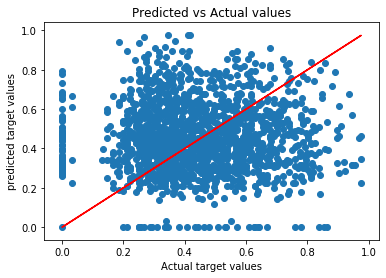

In [92]:
fig,ax = plt.subplots()
ax.scatter(test_y,y_pred)
ax.plot(test_y,test_y,color = 'red')
ax.set_xlabel('Actual target values')
ax.set_ylabel('predicted target values')
ax.set_title('Predicted vs Actual values')

##### MULTICOLLINEARITY - the degree by which independent variable are dependent on each other. Should be AS LESS AS POSSIBLE. Detected by calculating VIF(variance inflation factor), if VIF >5 or if VIF is high, then multicollinearity is high ( some independent variables are co-related with each other, WHICH ISN'T GOOD as it would be difficult to interpret the outcome of model)

In [93]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
X = cars1.drop(['price'],axis=1)
y = cars1['price']

In [95]:
cars1.head()

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer,gearbox,model,fuelType,brand,vehicleType
0,0.478732,0.303030,0.000000,0.614754,0.737172,1.0,0.956522,0.000000,0.051282,0.375
1,0.410088,0.363636,0.000000,0.614754,1.000000,1.0,0.869565,0.285714,0.512821,0.750
2,0.500522,0.606061,0.583333,0.000000,1.000000,1.0,0.782609,0.571429,0.025641,0.875
3,0.433572,0.484848,0.583333,0.168033,1.000000,0.5,0.710145,0.571429,0.820513,0.375
4,0.411451,0.454545,0.833333,0.586066,1.000000,1.0,0.956522,0.285714,0.051282,0.875


In [96]:
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
model= sm.OLS(y.astype(float), X.astype(float)).fit()

In [97]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     1089.
Date:                Thu, 20 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:35:54   Log-Likelihood:                 5660.4
No. Observations:                8314   AIC:                        -1.130e+04
Df Residuals:                    8304   BIC:                        -1.123e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1794      0.010     17.108      0.000       0.159       0.200
yearOfRegistration      0.3319      0.008     40.165      0.000       0.316       0.348
monthOfRegistration     0.0289      0.004      6.504      0.000       0.020       0.038
powerPS                 0.3079      0.006     47.822      0.000       0.295       0.321
kilometer              -0.1607      0.005    -31.064      0.000      -0.171      -0.151
gearbox                -0.0410      0.005     -8.388      0.000      -0.051      -0.031
model                  -0.0083      0.005     -1.702      0.089      -0.018       0.001
fuelType                0.2004      0.008     25.838      0.000       0.185       0.216
brand                   0.0076      0.004      1.849      0.064      -0.000       0.016
vehicleType             0.0749      0.005     13.800      0.000       0.064       0.086
==============================================================================
Omnibus:                     1055.631   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4457.603
Skew:                          -0.569   Prob(JB):                         0.00
Kurtosis:                       6.402   Cond. No.                         20.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
X.iloc[:,1:].corr()

,yearOfRegistration,monthOfRegistration,powerPS,kilometer,gearbox,model,fuelType,brand,vehicleType
yearOfRegistration,1.000000,0.003236,0.118376,-0.234955,-0.049865,-0.118186,0.130569,-0.038833,-0.363128
monthOfRegistration,0.003236,1.000000,0.131970,-0.028452,0.076992,-0.046359,0.140206,-0.011462,0.124164
powerPS,0.118376,0.131970,1.000000,0.008827,-0.028354,-0.043106,0.270758,-0.274680,0.231755
kilometer,-0.234955,-0.028452,0.008827,1.000000,-0.016158,0.132524,0.051423,-0.021178,-0.002150
gearbox,-0.049865,0.076992,-0.028354,-0.016158,1.000000,-0.020842,0.016474,0.044445,0.057951
model,-0.118186,-0.046359,-0.043106,0.132524,-0.020842,1.000000,-0.092846,0.062566,0.022985
fuelType,0.130569,0.140206,0.270758,0.051423,0.016474,-0.092846,1.000000,-0.053580,0.184143
brand,-0.038833,-0.011462,-0.274680,-0.021178,0.044445,0.062566,-0.053580,1.000000,-0.116066
vehicleType,-0.363128,0.124164,0.231755,-0.002150,0.057951,0.022985,0.184143,-0.116066,1.000000


In [99]:
vif = [variance_inflation_factor(train_X.astype(float).values, i) for i in range(train_X.astype(float).shape[1])]
cars_vif = pd.DataFrame({'vif': vif[0:]}, index=train_X.astype(float).columns).T
cars_vif

,yearOfRegistration,monthOfRegistration,powerPS,kilometer,gearbox,model,fuelType,brand,vehicleType
vif,7.330966,3.535327,5.358837,8.879478,9.010281,7.055538,5.443431,3.51676,5.919789


In [100]:
cars_final = cars1.drop(['yearOfRegistration','powerPS','kilometer','gearbox','model','fuelType','vehicleType'],axis=1)

In [101]:
cars_final.head()

,price,monthOfRegistration,brand
0,0.478732,0.000000,0.051282
1,0.410088,0.000000,0.512821
2,0.500522,0.583333,0.025641
3,0.433572,0.583333,0.820513
4,0.411451,0.833333,0.051282


In [102]:
X = cars_final.drop(['price'],axis=1)
y = cars_final['price']

In [103]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size = 0.2,random_state = 56)

In [104]:
#implement linear regression
from sklearn.linear_model import LinearRegression as LR #imported requ. library
from sklearn.metrics import mean_absolute_error as mae

In [105]:
lr = LR() #creating an instance of it
lr.fit(train_X,train_y) #fitting ove the TRAIN data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
train_predict = lr.predict(train_X)    # predicting over train data first and calculate mae(over train data)
k = mae(train_predict,train_y)
print('Training Mean absolute error', k)

Training Mean absolute error 0.13903169147703656


In [107]:
test_predict = lr.predict(test_X)  # predicting over test data first and calculate mae(over test data)
k = mae(test_predict,test_y)
print('Test Mean absolute error', k)

Test Mean absolute error 0.14556066421401365


In [108]:
from math import sqrt                   #first by MAE
mae = mae(test_y,test_predict)    
from sklearn.metrics import r2_score
r2 = r2_score(test_y, test_predict)

adj_r2 = 1 - float(len(y)-1)/(len(y)-len(lr.coef_)-1)*(1 - r2)

mae, r2, adj_r2,  lr.coef_, lr.intercept_

(0.14556066421401365,
 0.03596553574691852,
 0.03573354574228549,
 array([ 0.08747568, -0.06912927]),
 0.43542568755342076)

In [109]:
from sklearn.metrics import mean_squared_error            #SECOND BY RMSE
rmse = sqrt(mean_squared_error(test_y, test_predict))
from sklearn.metrics import r2_score
r2 = r2_score(test_y, test_predict)

adj_r2 = 1 - float(len(y)-1)/(len(y)-len(lr.coef_)-1)*(1 - r2)

rmse, r2, adj_r2, lr.coef_, lr.intercept_

(0.1822228280532604,
 0.03596553574691852,
 0.03573354574228549,
 array([ 0.08747568, -0.06912927]),
 0.43542568755342076)

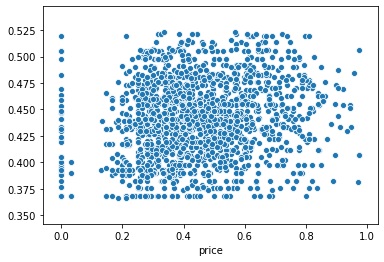

In [110]:
sns.scatterplot(test_y,test_predict)

In [112]:
from sklearn import metrics     #checking errors
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, test_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, test_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, test_predict)))

Mean Absolute Error: 0.14556066421401365
Mean Squared Error: 0.033205159063728104
Root Mean Squared Error: 0.1822228280532604


# MODEL 2 - KNN

In [114]:
cars1.head()

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer,gearbox,model,fuelType,brand,vehicleType
0,0.478732,0.303030,0.000000,0.614754,0.737172,1.0,0.956522,0.000000,0.051282,0.375
1,0.410088,0.363636,0.000000,0.614754,1.000000,1.0,0.869565,0.285714,0.512821,0.750
2,0.500522,0.606061,0.583333,0.000000,1.000000,1.0,0.782609,0.571429,0.025641,0.875
3,0.433572,0.484848,0.583333,0.168033,1.000000,0.5,0.710145,0.571429,0.820513,0.375
4,0.411451,0.454545,0.833333,0.586066,1.000000,1.0,0.956522,0.285714,0.051282,0.875


In [115]:
X = cars1.drop(['price'],axis=1)
y = cars1['price']
X.shape, y.shape

((8314, 9), (8314,))

In [116]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size = 0.2,random_state = 56)

In [117]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor as KNN #for importing the regressor
from sklearn.metrics import mean_squared_error as mse #for importing the evaluation metrics to look for errors

In [118]:
reg = KNN(n_neighbors = 5) #creating an instance/object of KNN
reg.fit(train_X,train_y) #fitting the model on just the TRAIN data
test_predict = reg.predict(test_X) #predicting over the test set
k = mse(test_predict,test_y)
print('Test MSE ',k)

Test MSE  0.013649810749874227


In [119]:
def Elbow(k):  #lets automate this process to check mse for different values of k
    test_mse = [] #initiating an empty list first
    for i in k:  #training model for every value of k
        reg = KNN(n_neighbors = i) #again creating an instance of KNN
        reg.fit(train_X,train_y) #fitting over the TRAIN data
        tmp = reg.predict(test_X) #predicting over the test set using a variable tmp
        tmp = mse(tmp,test_y)
        test_mse.append(tmp)  #appending the values of mse to empty list test_mse
    return test_mse

In [120]:
k = range(1,30) #defining k range

In [121]:
test = Elbow(k) #calling above defined function

Text(0.5, 1.0, 'elbow curve for test')

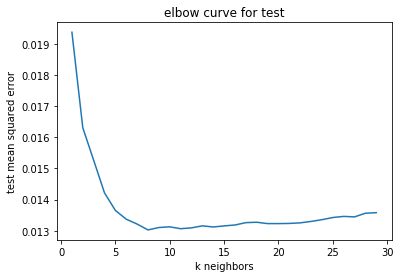

In [122]:
plt.plot(k,test)
plt.xlabel('k neighbors')
plt.ylabel('test mean squared error')
plt.title('elbow curve for test')

In [123]:
d = {'k': k,'test' : test}
d = pd.DataFrame(d)
d.sort_values(by=['test'])

,k,test
7,8,0.013025
10,11,0.013064
11,12,0.013090
8,9,0.013102
13,14,0.013119
9,10,0.013124
14,15,0.013154
12,13,0.013156
15,16,0.013183
6,7,0.013212


In [124]:
reg = KNN(n_neighbors = 8) #creating instance of KNN and selecting that k value which results in minimum test error
reg.fit(train_X,train_y) #fitting over the TRAIN data
test_predict = reg.predict(test_X) #predicting over the test set and calculate mse(over test data)
k = mse(test_predict, test_y)
print('Test MSE ',k)

Test MSE  0.013024524027104713


Text(0.5, 1.0, 'Predicted vs Actual values')

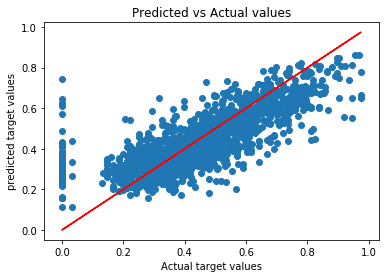

In [125]:
fig,ax = plt.subplots()
ax.scatter(test_y,test_predict)
ax.plot(test_y,test_y,color = 'red')
ax.set_xlabel('Actual target values')
ax.set_ylabel('predicted target values')
ax.set_title('Predicted vs Actual values')

In [126]:
from sklearn import metrics     #checking errors(when we havent given any paramter to decision tree regressor)
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, test_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, test_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, test_predict)))

Mean Absolute Error: 0.08121475535955917
Mean Squared Error: 0.013024524027104713
Root Mean Squared Error: 0.11412503681096761


# MODEL 3 - Decision Tree

In [127]:
# how to import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [128]:
#creating the decision tree function
dt_model = DecisionTreeRegressor(random_state = 56)
#fitting the model
dt_model.fit(train_X, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=56, splitter='best')

In [129]:
#checking the training score
dt_model.score(train_X, train_y)

0.9964400100908746

In [130]:
#checking the test score
dt_model.score(test_X, test_y)

0.4601534835417378

In [131]:
y_pred = dt_model.predict(test_X) #just creating a dataframe with actual and predicted test (y) values
df=pd.DataFrame({'Actual':test_y, 'Predicted':y_pred})  
df .head()

,Actual,Predicted
3395,0.368788,0.286477
6417,0.298682,0.273133
6480,0.524392,0.610261
6563,0.749855,0.643491
8254,0.572955,0.454501


Text(0.5, 1.0, 'Predicted vs Actual values')

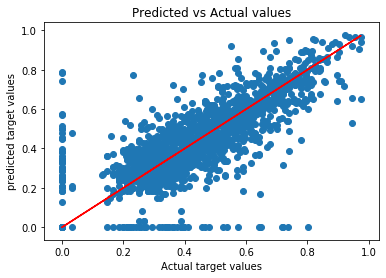

In [133]:
fig,ax = plt.subplots()
ax.scatter(test_y,y_pred)
ax.plot(test_y,test_y,color = 'red')
ax.set_xlabel('Actual target values')
ax.set_ylabel('predicted target values')
ax.set_title('Predicted vs Actual values')

In [134]:
from sklearn import metrics     #checking errors(when we havent given any paramter to decision tree regressor)
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

Mean Absolute Error: 0.09082063652566899
Mean Squared Error: 0.01859444876058933
Root Mean Squared Error: 0.13636146362000273


# Model 4 - Random forest

In [135]:
#Importing random forest classifier 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [136]:
#creating a random forest instance   #while initializing no parameter
rfr = RandomForestRegressor(random_state=56)

In [137]:
#train the model
rfr.fit(train_X,train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=56, verbose=0, warm_start=False)

In [138]:
#score on training data
rfr.score(train_X, train_y)

0.9542681291885096

In [139]:
#score on training data
rfr.score(test_X, test_y)

0.6991980632359852

In [140]:
#looking at the feature importance
rfr.feature_importances_

array([0.42996134, 0.05433037, 0.22939192, 0.03023557, 0.01344014,
       0.05404128, 0.02457315, 0.0533262 , 0.11070004])

In [141]:
#feature importance against each variable
pd.Series(rfr.feature_importances_, index=train_X.columns)

yearOfRegistration     0.429961
monthOfRegistration    0.054330
powerPS                0.229392
kilometer              0.030236
gearbox                0.013440
model                  0.054041
fuelType               0.024573
brand                  0.053326
vehicleType            0.110700
dtype: float64

In [142]:
from sklearn.model_selection import RandomizedSearchCV  #initializing parameter now
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [143]:
# Use the random grid to search for best hyperparameters  #done to check which are best hyperparameters
# First create the base model to tune
rfr = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,
                               n_iter = 6, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfr_random.fit(train_X, train_y)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.6min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [144]:
rfr_random.best_params_   #check for best parameter

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [145]:
#score on training data           #reduced slightly but atleast now the training data isn't overfitting
rfr_random.score(train_X, train_y)

0.9072305709049917

In [146]:
#score on training data           #improved slightly
rfr_random.score(test_X, test_y)

0.7261871764685411

In [147]:
y_predict = rfr_random.predict(test_X)
DT=pd.DataFrame({'Actual':test_y, 'Predicted':y_predict})  
DT.head()

,Actual,Predicted
3395,0.368788,0.316339
6417,0.298682,0.258722
6480,0.524392,0.521135
6563,0.749855,0.630352
8254,0.572955,0.467047


Text(0.5, 1.0, 'Predicted vs Actual values')

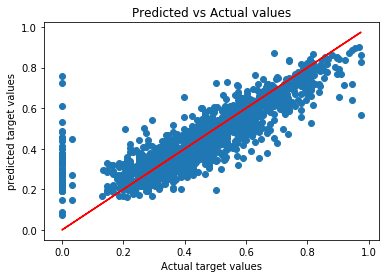

In [148]:
fig,ax = plt.subplots()
ax.scatter(test_y,y_predict)
ax.plot(test_y,test_y,color = 'red')
ax.set_xlabel('Actual target values')
ax.set_ylabel('predicted target values')
ax.set_title('Predicted vs Actual values')

In [149]:
from sklearn import metrics     #checking errors for new case(when we had manually defined some parameter values)
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_predict)))

Mean Absolute Error: 0.06466136151202105
Mean Squared Error: 0.009431196389949544
Root Mean Squared Error: 0.09711434698307735
